# MNSIT Digit classifiaction using CNN

In [16]:
# Import important library
import numpy as np
import pandas as ps 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
# Show Data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


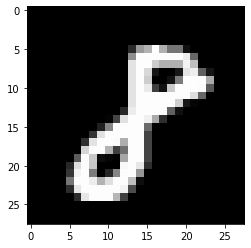

In [6]:
# Let's see in image form
img_index = 31 # select anything up to 60000
plt.imshow(x_train[img_index], cmap = 'gray')
plt.show()

In [7]:
# Reshaping the images so that it work on Keras API
# Keras accept input data as -> (num_img, img_shape, img_chenal)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# Data Scaling & Normalization
# Making Sure that the values are float so that we can decimal points after division 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalization the RBG codes by dividing it to the max RGB values.
x_train/=255-0.5
x_test/=255-0.5

In [9]:
## Creating a Sequential model for CNN in Keras

num_filter = 10
filter_size = 3
pool_size1 = 2

model = Sequential()
model.add(Conv2D(num_filter, filter_size, strides=(1,1), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=pool_size1))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [24]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Train the model
model_history = model.fit(x_train, to_categorical(y_train), epochs =3, verbose =1, validation_data=(x_test,to_categorical(y_test)))

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1038 - accuracy: 0.9700 - val_loss: 0.0926 - val_accuracy: 0.9724
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0823 - accuracy: 0.9770 - val_loss: 0.0839 - val_accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0696 - accuracy: 0.9799 - val_loss: 0.0822 - val_accuracy: 0.9737


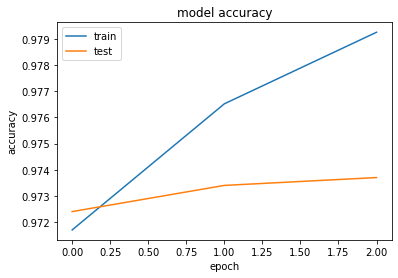

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

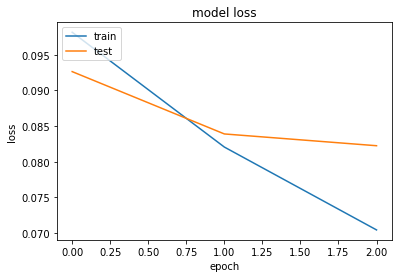

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Score
score = model.evaluate(x_test, to_categorical(y_test), verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.08224701881408691
Test accuracy 0.9736999869346619


In [39]:
# Predict the first 5 images
prediction = model.predict(x_test[:5])
print(prediction)

# Print our model Prediction
print(np.argmax(prediction, axis=1))

#Check our prediction against the grount truth
print(y_test[:5])

[[4.37183900e-07 1.19467813e-07 3.88237095e-06 6.08315349e-05
  3.30035817e-07 2.28872530e-08 1.03206636e-11 9.99925613e-01
  1.24787192e-07 8.54737300e-06]
 [1.86794314e-05 3.80227812e-06 9.98528361e-01 6.17652904e-06
  2.22376111e-11 9.71400550e-06 1.41535560e-03 5.72560984e-15
  1.79089257e-05 8.11035739e-10]
 [2.24818432e-05 9.99641657e-01 2.77702420e-05 1.29301793e-06
  1.04216953e-04 3.79492235e-06 7.56033023e-06 1.73041932e-04
  1.75415535e-05 6.02096463e-07]
 [9.99832273e-01 5.14318117e-07 1.20494944e-04 3.30156560e-08
  1.74478930e-06 1.66638838e-05 2.49094464e-05 9.45394106e-07
  9.43949033e-07 1.40121301e-06]
 [2.81842222e-05 6.17386092e-07 1.18912510e-06 8.01895851e-07
  9.99559700e-01 2.87575261e-08 5.88178636e-07 3.15888155e-06
  3.34040919e-07 4.05336410e-04]]
[7 2 1 0 4]
[7 2 1 0 4]
